In [1]:
import numpy as np
import pandas as pd
import bqplot
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate as cv
from sklearn.metrics import mean_squared_error, r2_score
import random

# import tsfresh lib: capture 
## Swap out algorithms!

## 1. Data Exploration (Apr 1)

##### Interpretation 1: 
(1) Sales change by Department throughout days

In [2]:
calendar = pd.DataFrame(pd.read_csv("../calendar.csv"))

train_sales = pd.DataFrame(pd.read_csv("../sales_train_validation.csv"))

train_sales

# Mean of sales
# Linear trend of sales
# last time the sales reached maximum
# ** 56 classification / regression tasks
# Cartessian 
# Each data has 3 or more dimensions (distance to mean) K-means

# fourier
# tree-based mdls for interactions between features

id        item_id    dept_id   cat_id  \
0      HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1      HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2      HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3      HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4      HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                              ...            ...        ...      ...   
30485    FOODS_3_823_WI_3_validation    FOODS_3_823    FOODS_3    FOODS   
30486    FOODS_3_824_WI_3_validation    FOODS_3_824    FOODS_3    FOODS   
30487    FOODS_3_825_WI_3_validation    FOODS_3_825    FOODS_3    FOODS   
30488    FOODS_3_826_WI_3_validation    FOODS_3_826    FOODS_3    FOODS   
30489    FOODS_3_827_WI_3_validation    FOODS_3_827    FOODS_3    FOODS   

      store_id state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  \
0         CA_1       CA    0    0    0    0  ...       1       3       0   
1         CA_1       CA    0    0    0    0  ...       0       0       0   
2         CA_1       CA    0    0    0    0  ...       2       1       2   
3         CA_1       CA    0    0    0    0  ...       1       0       5   
4         CA_1       CA    0    0    0    0  ...       2       1       1   
...        ...      ...  ...  ...  ...  ...  ...     ...     ...     ...   
30485     WI_3       WI    0    0    2    2  ...       2       0       0   
30486     WI_3       WI    0    0    0    0  ...       0       0       0   
30487     WI_3       WI    0    6    0    2  ...       2       1       0   
30488     WI_3       WI    0    0    0    0  ...       0       0       1   
30489     WI_3       WI    0    0    0    0  ...       0       0       0   

       d_1907  d_1908  d_1909  d_1910  d_1911  d_1912  d_1913  
0           1       1       1       3       0       1       1  
1           0       0       1       0       0       0       0  
2           1       1       1       0       1       1       1  
3           4       1       0       1       3       7       2  
4           0       1       1       2       2       2       4  
...       ...     ...     ...     ...     ...     ...     ...  
30485       0       0       0       1       0       0       1  
30486       0       0       0       0       0       1       0  
30487       2       0       1       0       0       1       0  
30488       0       0       1       0       3       1       3  
30489       0       0       0       0       0       0       0  

[30490 rows x 1919 columns]

### Aggregation Level 5
#### Unit sales of all products, aggregated for each department

In [3]:
sales_pd_lvl5 = train_sales.groupby(['dept_id']).sum().iloc[:, :].transpose().reset_index()
#sales_pd_lvl5['dept_id'] = sales_pd_lvl5['dept_id'].str.slice(2, -1, 1)
#real_headers = sales_pd_lvl5.iloc(0)
#real_data = sales_pd_lvl5[1:]
#print(real_headers)
#print(real_data)

sales_pd_lvl5['index']  = sales_pd_lvl5['index'].str.slice(2).astype(int)
sales_pd_lvl5 = sales_pd_lvl5.rename(columns={"index": "day"})
sales_pd_lvl5.columns.name = "Idx"
sales_pd_lvl5

Idx    day  FOODS_1  FOODS_2  FOODS_3  HOBBIES_1  HOBBIES_2  HOUSEHOLD_1  \
0        1     2343     4094    16741       3610        154         4105   
1        2     2216     4209    16333       3172        185         3858   
2        3     1657     3174    12343       2497        185         2827   
3        4     1508     3606    13764       2531        138         2732   
4        5     1209     2869    10525       1714        100         1802   
...    ...      ...      ...      ...        ...        ...          ...   
1908  1909     2657     4734    16241       3141        331         6393   
1909  1910     2639     4446    16232       3014        339         6580   
1910  1911     3169     4974    18561       3678        407         7762   
1911  1912     3712     5524    22691       4397        390         9545   
1912  1913     3185     6473    22996       4226        457         9795   

Idx   HOUSEHOLD_2  
0            1584  
1            1776  
2            1100  
3            1133  
4             927  
...           ...  
1908         1846  
1909         1783  
1910         1966  
1911         2703  
1912         2663  

[1913 rows x 8 columns]

Text(0, 0.5, 'Unit Sales')

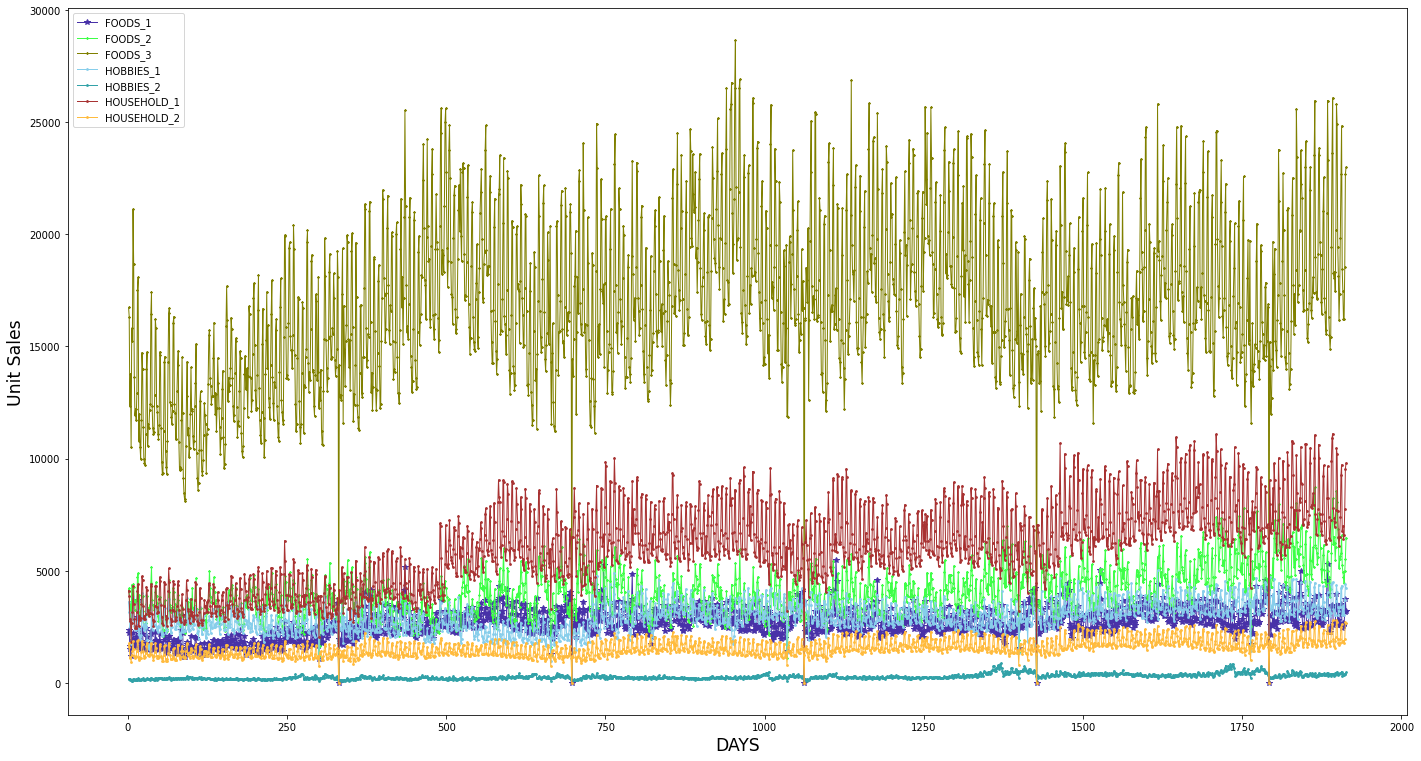

In [4]:
# multiple line plot
# plt.plot( 'index', 'FOODS_1', data=sales_pd_lvl5, marker='o', markerfacecolor='green', markersize=7, color='skyblue', linewidth=3)
plt.figure(figsize=(24,13))
plt.plot( 'day', 'FOODS_1', data=sales_pd_lvl5, marker='*', color='#4832a8', linewidth=1)
plt.plot( 'day', 'FOODS_2', data=sales_pd_lvl5, marker='*', markersize=2, color='#3dff47', linewidth=1)
plt.plot( 'day', 'FOODS_3', data=sales_pd_lvl5, marker='*', markersize=2, color='olive', linewidth=1)
plt.plot( 'day', 'HOBBIES_1', data=sales_pd_lvl5, marker='p', markersize=2, color='skyblue', linewidth=1)
plt.plot( 'day', 'HOBBIES_2', data=sales_pd_lvl5, marker='p', markersize=2, color='#32a2a8', linewidth=1)
plt.plot( 'day', 'HOUSEHOLD_1', data=sales_pd_lvl5, marker='p', markersize=2, color='#a83232', linewidth=1)
plt.plot( 'day', 'HOUSEHOLD_2', data=sales_pd_lvl5, marker='p', markersize=2, color='#ffbb3d', linewidth=1)

plt.legend()
plt.xlabel('DAYS', fontsize = 'xx-large')
plt.ylabel('Unit Sales', fontsize = 'xx-large')

## 2. Training & Testing: Sets hardcoded (May 24)
### The methods herein are referenced from: 

- https://machinelearningmastery.com/k-fold-cross-validation/
- https://www.databriefing.com/coding/predict-sales-1/

In [5]:
train_data_lvl5 = sales_pd_lvl5[:-56]
test_data_lvl5 = sales_pd_lvl5[-56:]

train_data_lvl5

Idx    day  FOODS_1  FOODS_2  FOODS_3  HOBBIES_1  HOBBIES_2  HOUSEHOLD_1  \
0        1     2343     4094    16741       3610        154         4105   
1        2     2216     4209    16333       3172        185         3858   
2        3     1657     3174    12343       2497        185         2827   
3        4     1508     3606    13764       2531        138         2732   
4        5     1209     2869    10525       1714        100         1802   
...    ...      ...      ...      ...        ...        ...          ...   
1852  1853     2558     4183    15220       2949        355         7060   
1853  1854     2498     3896    16012       3023        291         7151   
1854  1855     3222     4050    16936       3614        343         7503   
1855  1856     3577     5493    21997       3957        432         9810   
1856  1857     3358     6485    22991       4489        395        10492   

Idx   HOUSEHOLD_2  
0            1584  
1            1776  
2            1100  
3            1133  
4             927  
...           ...  
1852         1743  
1853         1744  
1854         1981  
1855         2621  
1856         2705  

[1857 rows x 8 columns]

Coefficients: 
 [ 0.08199105 -0.07994154  0.0833547   0.01686524  0.84610894  0.1194878
 -0.00721733]
Mean squared error: 148996.14
Coefficient of determination: 0.55


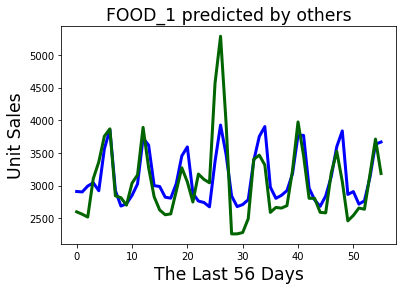

In [6]:
X_train = train_data_lvl5[['day','FOODS_2','FOODS_3','HOBBIES_1','HOBBIES_2','HOUSEHOLD_1','HOUSEHOLD_2']]
Y_train = train_data_lvl5['FOODS_1'].astype('int')


X_test = test_data_lvl5[['day','FOODS_2','FOODS_3','HOBBIES_1','HOBBIES_2','HOUSEHOLD_1','HOUSEHOLD_2']]
Y_test = test_data_lvl5['FOODS_1'].astype('int')


lr = LinearRegression()
lr.fit(X_train, Y_train)

Y_pred = lr.predict(X_test)

print('Coefficients: \n', lr.coef_)
# The mean squared error~~no idea what this 
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: means the prediction is flawless
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_pred))


# Plot outputs
#plt.scatter(X_test, Y_test,  color='black')

plt.plot(Y_pred, color='blue', linewidth=3)
plt.plot(Y_test.values.tolist(), color='darkgreen', linewidth=3)

#plt.xticks(())
#plt.yticks(())
plt.title("FOOD_1 predicted by others", fontsize = "xx-large")
plt.xlabel("The Last 56 Days", fontsize = "xx-large")
plt.ylabel("Unit Sales", fontsize = "xx-large")
plt.show()

In [7]:
# "X" as in the data with features, and "y" as in 

#X_F1 = sales_by_dpt_by_day.drop(['FOODS_1'], axis=1).values
#y_F1 = sales_by_dpt_by_day.FOODS_1.values
#print("The training dataset has {} examples and {} features.".format(X_F1.shape[0], X_F1.shape[1]))
# This is, of course, grossly detached from reality. Will have to replace these with other features.


In [8]:
# lr = LinearRegression()
#kfolds = sklearn.model_selection.KFold(X_F1.shape[0], shuffle=True, random_state=42)
#scores = sklearn.model_selection.cross_val_score(LinearRegression(), X_F1, y_F1, cv=kfolds)

#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

In [9]:
X_train = train_data_lvl5[['day','FOODS_2','FOODS_3','HOBBIES_1','HOBBIES_2','HOUSEHOLD_1','HOUSEHOLD_2']]
Y_train = train_data_lvl5['FOODS_1'].astype('int')


X_test = test_data_lvl5[['day','FOODS_2','FOODS_3','HOBBIES_1','HOBBIES_2','HOUSEHOLD_1','HOUSEHOLD_2']]
Y_test = test_data_lvl5['FOODS_1'].astype('int')


### Aggregation Level 9
#### Unit sales of all products, aggregated for each store and department

In [10]:
sales_pd_lvl9 = train_sales.groupby(['dept_id', 'store_id']).sum().iloc[:, :].transpose().reset_index()
#sales_pd_lvl9['dept_id'] = sales_pd_lvl9['dept_id'].str.slice(2, -1, 1)
#real_headers = sales_pd_lvl9.iloc(0)
#real_data = sales_pd_lvl9[1:]
#print(real_headers)
#print(real_data)

sales_pd_lvl9['index']  = sales_pd_lvl9['index'].str.slice(2).astype(int)
sales_pd_lvl9 = sales_pd_lvl9.rename(columns={"index": "day"})
sales_pd_lvl9.columns.name = "Idx"
sales_pd_lvl9

dept_id    day FOODS_1                                          ...  \
store_id          CA_1 CA_2 CA_3 CA_4 TX_1 TX_2 TX_3 WI_1 WI_2  ...   
0            1     297  406  341  113  152  210  138  343  191  ...   
1            2     284  408  326  124  154  169  123  306  184  ...   
2            3     214  238  260   75  109  159  113  208  154  ...   
3            4     175  240  231   97  126  107   84  145  205  ...   
4            5     182  220  220  107  108  128   61    0   96  ...   
...        ...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1908      1909     287  422  306  201  176  221  247  282  335  ...   
1909      1910     297  334  276  190  198  207  302  301  307  ...   
1910      1911     331  579  335  229  201  235  259  339  400  ...   
1911      1912     419  623  510  250  218  280  250  430  408  ...   
1912      1913     329  520  423  257  221  220  209  342  347  ...   

dept_id  HOUSEHOLD_2                                               
store_id        CA_1 CA_2 CA_3 CA_4 TX_1 TX_2 TX_3 WI_1 WI_2 WI_3  
0                181  234  286   64  106  199  120  148   98  148  
1                170  267  341   89  148  183  138  151   94  195  
2                114  158  231   73   69  117   97   66   69  106  
3                123  164  264   79   91  108   83   47   80   94  
4                135  151  272   73   67   98   46    0   32   53  
...              ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
1908             204  255  314  157  157  182  158  158  113  148  
1909             186  250  259  127  175  187  161  169  127  142  
1910             205  323  320  125  133  211  131  192  160  166  
1911             319  486  414  183  227  260  185  203  194  232  
1912             324  432  465  177  228  244  191  224  177  201  

[1913 rows x 71 columns]

In [11]:
sales_pd_lvl9.columns = sales_pd_lvl9.columns.map('_'.join)

In [12]:
#for col in sales_pd_lvl9.columns: 
#    print(col) 

Text(0, 0.5, 'Unit Sales of all products')

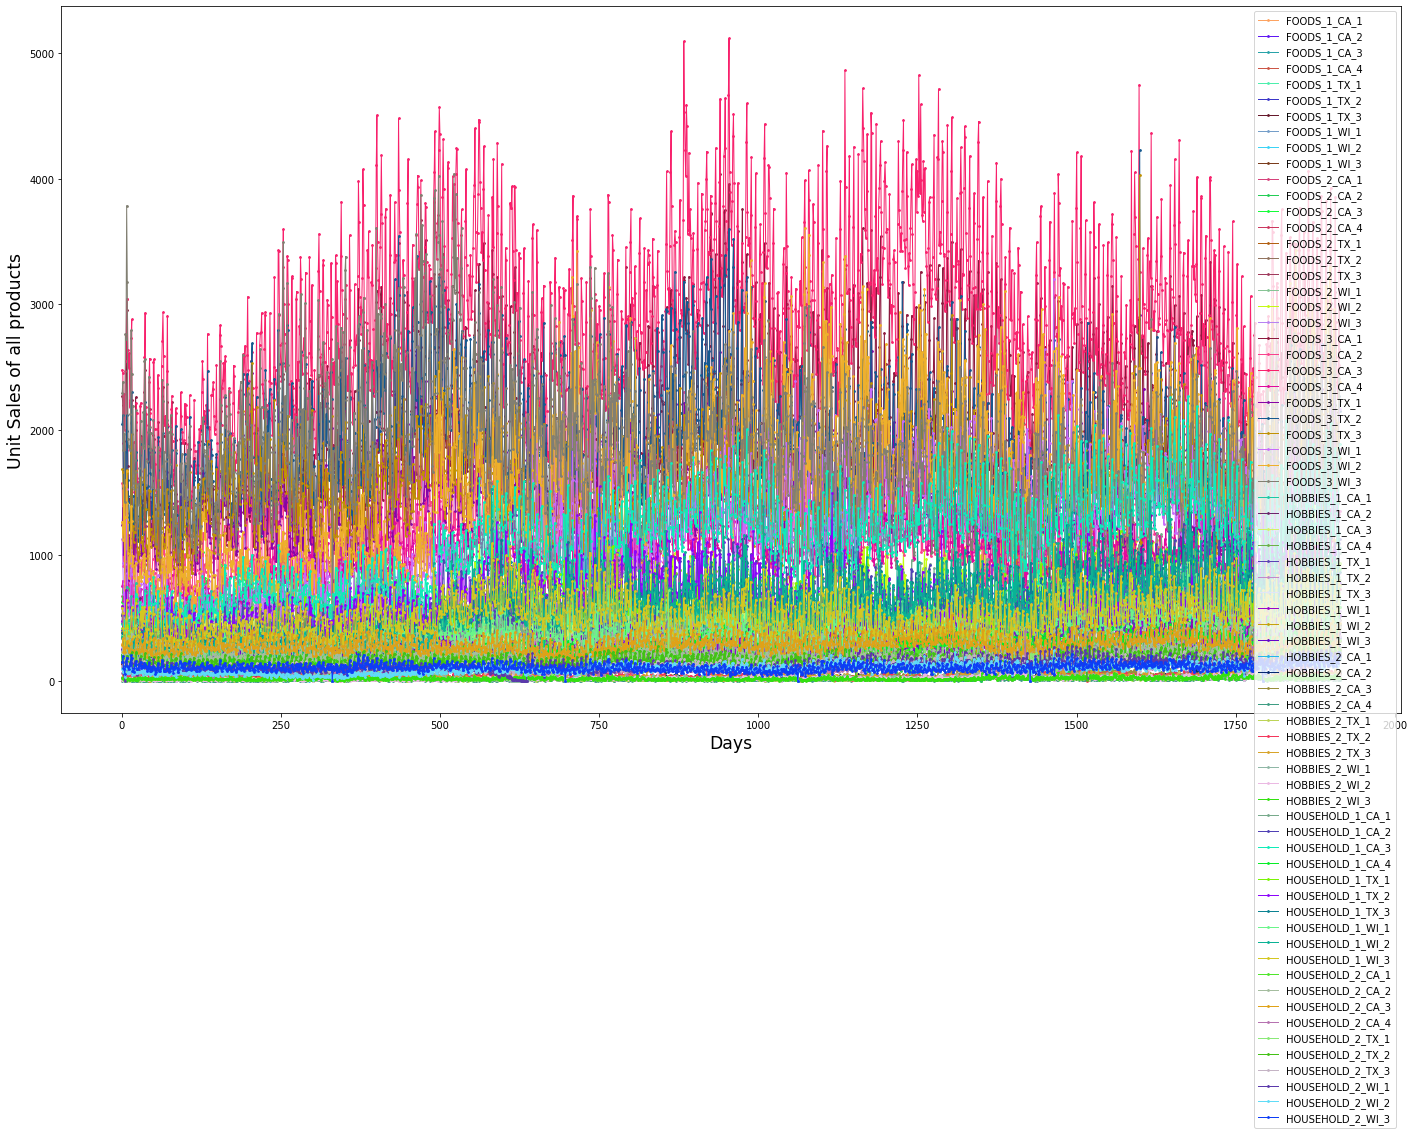

In [13]:
plt.figure(figsize=(24,13))
for each_series in sales_pd_lvl9.columns[1:]:
    plt.plot('day_', each_series, data=sales_pd_lvl9, marker='p', markersize=2, color=(random.random(), random.random(), random.random()), linewidth=1)
plt.legend()
plt.xlabel('Days', fontsize = 'xx-large')
plt.ylabel('Unit Sales of all products', fontsize = 'xx-large')

In [14]:
train_data_lvl9 = sales_pd_lvl9[:-56]
test_data_lvl9 = sales_pd_lvl9[-56:]

train_data_lvl9

Idx   day_  FOODS_1_CA_1  FOODS_1_CA_2  FOODS_1_CA_3  FOODS_1_CA_4  \
0        1           297           406           341           113   
1        2           284           408           326           124   
2        3           214           238           260            75   
3        4           175           240           231            97   
4        5           182           220           220           107   
...    ...           ...           ...           ...           ...   
1852  1853           253           317           410           187   
1853  1854           181           369           433           172   
1854  1855           375           432           479           273   
1855  1856           427           566           599           227   
1856  1857           350           520           501           268   

Idx   FOODS_1_TX_1  FOODS_1_TX_2  FOODS_1_TX_3  FOODS_1_WI_1  FOODS_1_WI_2  \
0              152           210           138           343           191   
1              154           169           123           306           184   
2              109           159           113           208           154   
3              126           107            84           145           205   
4              108           128            61             0            96   
...            ...           ...           ...           ...           ...   
1852           127           242           306           194           285   
1853           155           213           239           253           285   
1854           200           270           257           262           422   
1855           224           264           225           344           436   
1856           205           222           282           365           369   

Idx   ...  HOUSEHOLD_2_CA_1  HOUSEHOLD_2_CA_2  HOUSEHOLD_2_CA_3  \
0     ...               181               234               286   
1     ...               170               267               341   
2     ...               114               158               231   
3     ...               123               164               264   
4     ...               135               151               272   
...   ...               ...               ...               ...   
1852  ...               185               237               266   
1853  ...               150               193               288   
1854  ...               197               285               281   
1855  ...               298               494               413   
1856  ...               319               452               433   

Idx   HOUSEHOLD_2_CA_4  HOUSEHOLD_2_TX_1  HOUSEHOLD_2_TX_2  HOUSEHOLD_2_TX_3  \
0                   64               106               199               120   
1                   89               148               183               138   
2                   73                69               117                97   
3                   79                91               108                83   
4                   73                67                98                46   
...                ...               ...               ...               ...   
1852                96               199               171               183   
1853                95               182               189               149   
1854               106               187               251               167   
1855               124               239               241               187   
1856               177               276               277               199   

Idx   HOUSEHOLD_2_WI_1  HOUSEHOLD_2_WI_2  HOUSEHOLD_2_WI_3  
0                  148                98               148  
1                  151                94               195  
2                   66                69               106  
3                   47                80                94  
4                    0                32                53  
...                ...               ...               ...  
1852               147       

In [15]:
wholeList = train_data_lvl9.columns.tolist()
wholeList.remove('day_')
xList = wholeList
print(xList)

['FOODS_1_CA_1', 'FOODS_1_CA_2', 'FOODS_1_CA_3', 'FOODS_1_CA_4', 'FOODS_1_TX_1', 'FOODS_1_TX_2', 'FOODS_1_TX_3', 'FOODS_1_WI_1', 'FOODS_1_WI_2', 'FOODS_1_WI_3', 'FOODS_2_CA_1', 'FOODS_2_CA_2', 'FOODS_2_CA_3', 'FOODS_2_CA_4', 'FOODS_2_TX_1', 'FOODS_2_TX_2', 'FOODS_2_TX_3', 'FOODS_2_WI_1', 'FOODS_2_WI_2', 'FOODS_2_WI_3', 'FOODS_3_CA_1', 'FOODS_3_CA_2', 'FOODS_3_CA_3', 'FOODS_3_CA_4', 'FOODS_3_TX_1', 'FOODS_3_TX_2', 'FOODS_3_TX_3', 'FOODS_3_WI_1', 'FOODS_3_WI_2', 'FOODS_3_WI_3', 'HOBBIES_1_CA_1', 'HOBBIES_1_CA_2', 'HOBBIES_1_CA_3', 'HOBBIES_1_CA_4', 'HOBBIES_1_TX_1', 'HOBBIES_1_TX_2', 'HOBBIES_1_TX_3', 'HOBBIES_1_WI_1', 'HOBBIES_1_WI_2', 'HOBBIES_1_WI_3', 'HOBBIES_2_CA_1', 'HOBBIES_2_CA_2', 'HOBBIES_2_CA_3', 'HOBBIES_2_CA_4', 'HOBBIES_2_TX_1', 'HOBBIES_2_TX_2', 'HOBBIES_2_TX_3', 'HOBBIES_2_WI_1', 'HOBBIES_2_WI_2', 'HOBBIES_2_WI_3', 'HOUSEHOLD_1_CA_1', 'HOUSEHOLD_1_CA_2', 'HOUSEHOLD_1_CA_3', 'HOUSEHOLD_1_CA_4', 'HOUSEHOLD_1_TX_1', 'HOUSEHOLD_1_TX_2', 'HOUSEHOLD_1_TX_3', 'HOUSEHOLD_1_WI_1',

### Predict Unit Sales on Aggregation Level 9:

Coefficient of determination: 0.76


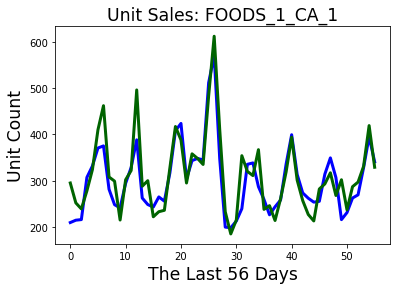

Coefficient of determination: 0.72


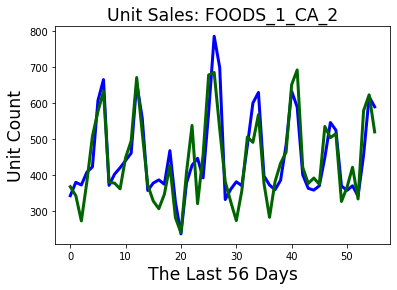

Coefficient of determination: 0.57


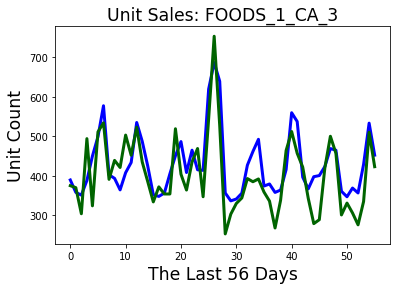

Coefficient of determination: 0.08


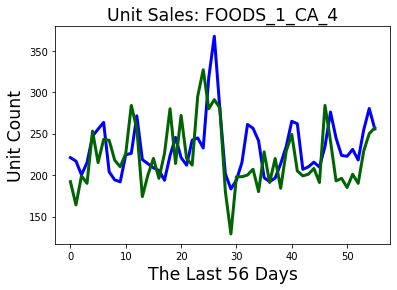

Coefficient of determination: 0.28


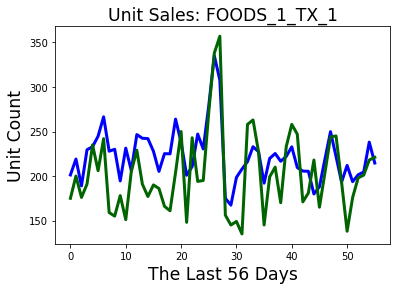

Coefficient of determination: 0.59


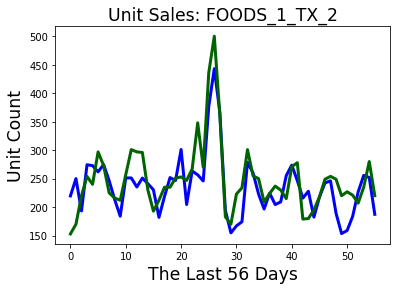

Coefficient of determination: 0.52


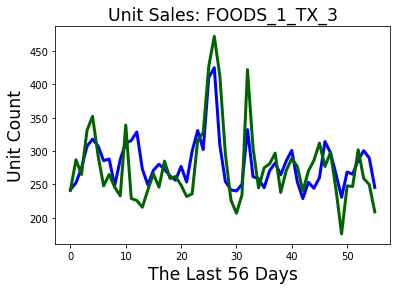

Coefficient of determination: 0.72


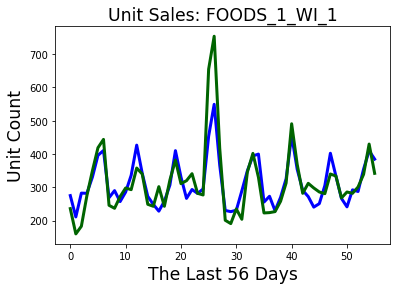

Coefficient of determination: 0.34


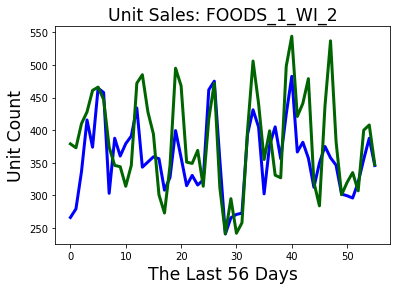

Coefficient of determination: 0.00


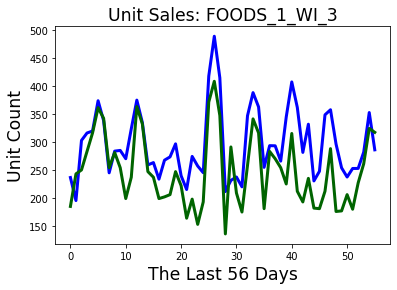

Coefficient of determination: 0.85


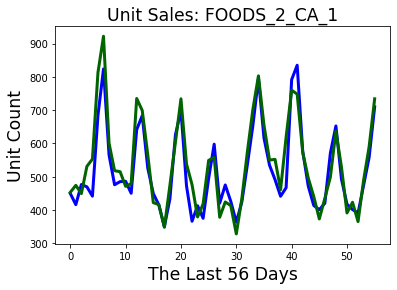

Coefficient of determination: 0.71


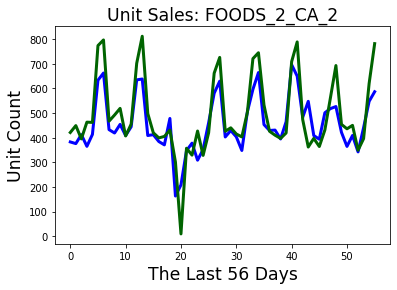

Coefficient of determination: 0.73


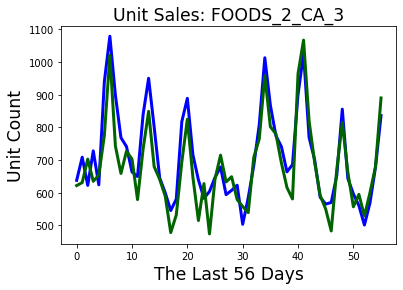

Coefficient of determination: 0.61


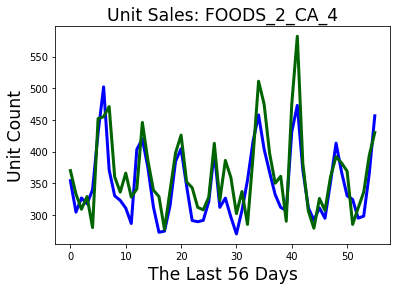

Coefficient of determination: 0.57


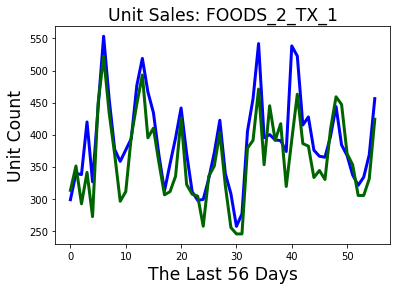

Coefficient of determination: 0.07


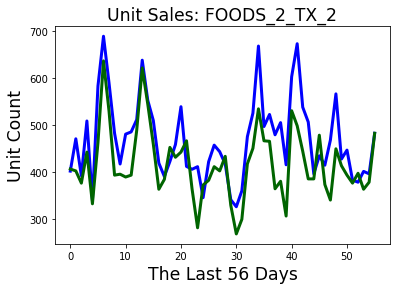

Coefficient of determination: 0.62


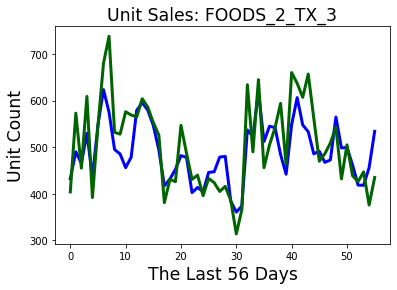

Coefficient of determination: 0.85


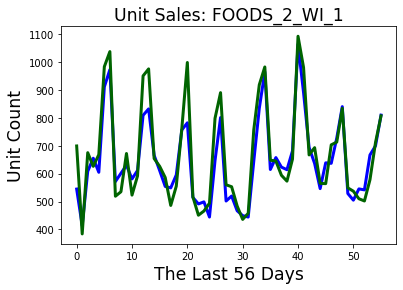

Coefficient of determination: 0.73


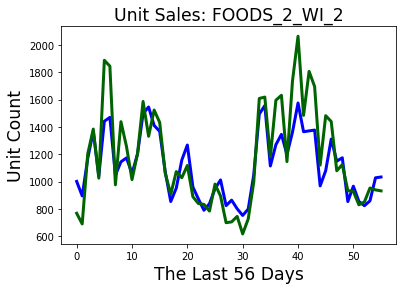

Coefficient of determination: 0.61


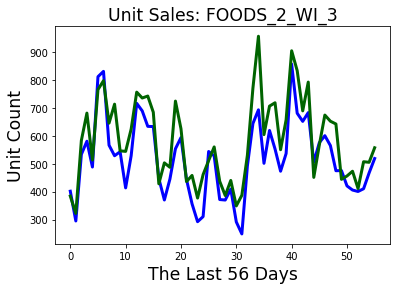

Coefficient of determination: 0.90


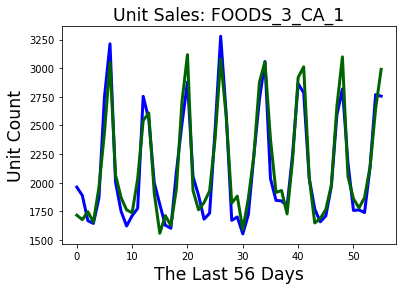

Coefficient of determination: 0.89


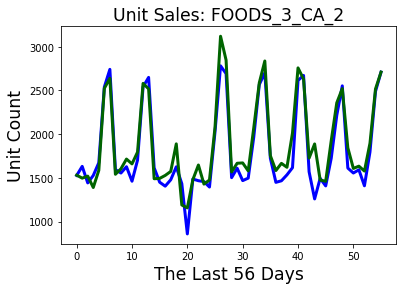

Coefficient of determination: 0.59


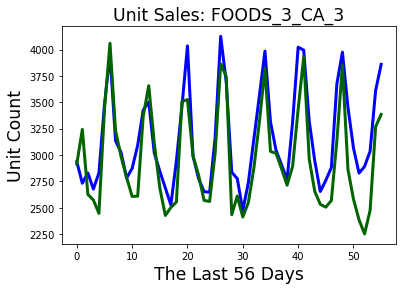

Coefficient of determination: 0.63


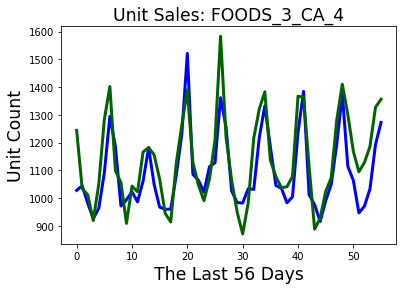

Coefficient of determination: 0.58


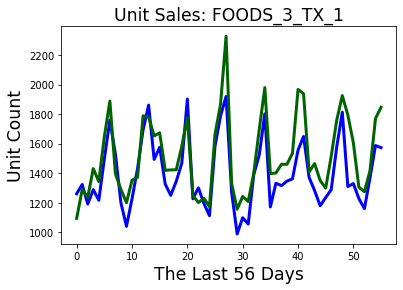

Coefficient of determination: 0.83


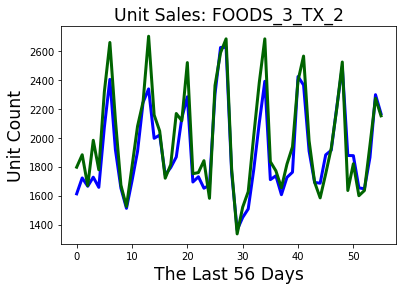

Coefficient of determination: 0.55


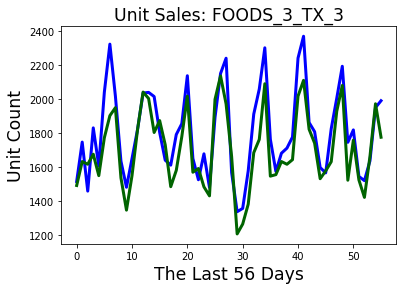

Coefficient of determination: 0.86


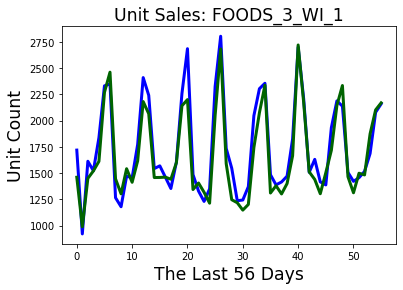

Coefficient of determination: 0.76


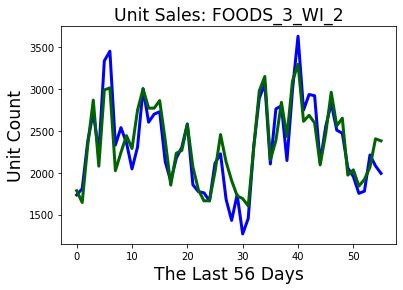

Coefficient of determination: 0.78


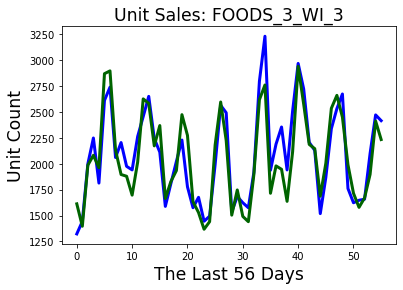

Coefficient of determination: 0.42


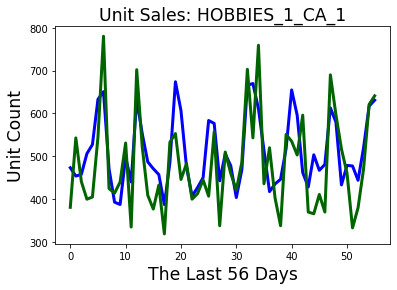

Coefficient of determination: 0.62


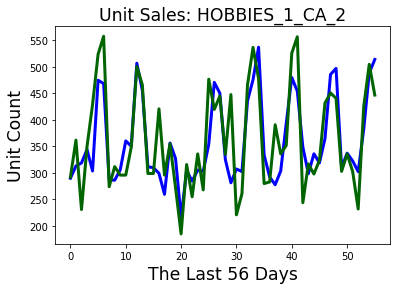

Coefficient of determination: 0.27


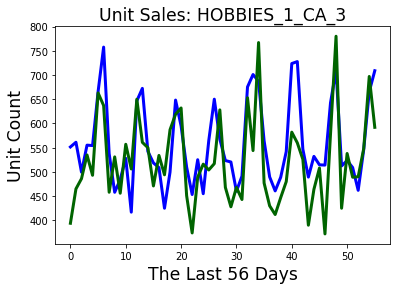

Coefficient of determination: -0.50


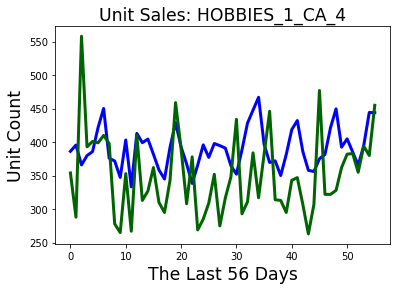

Coefficient of determination: 0.49


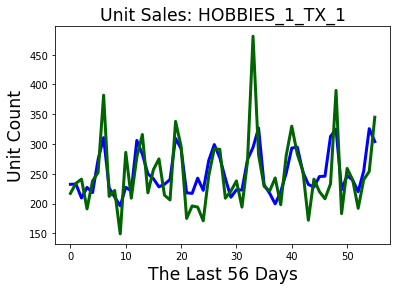

Coefficient of determination: 0.20


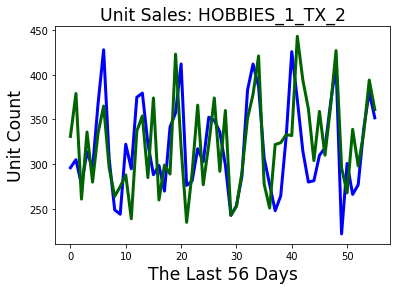

Coefficient of determination: 0.40


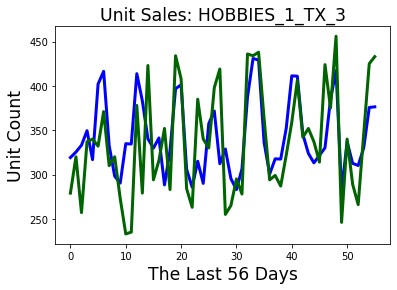

Coefficient of determination: 0.70


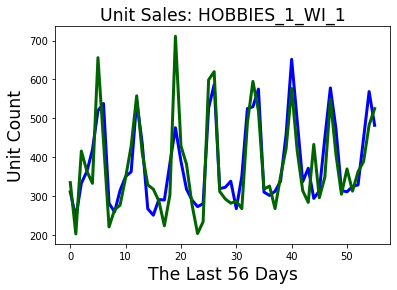

Coefficient of determination: 0.13


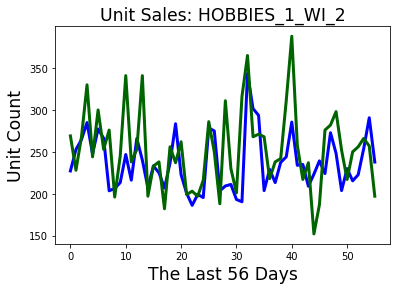

Coefficient of determination: 0.33


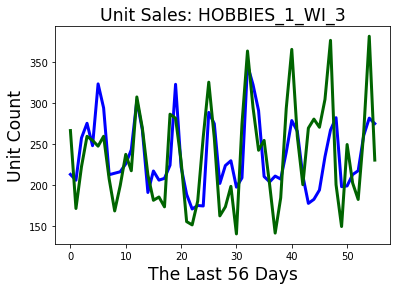

Coefficient of determination: 0.02


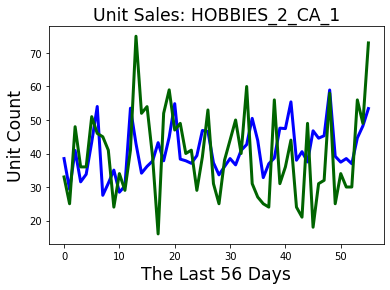

Coefficient of determination: -0.20


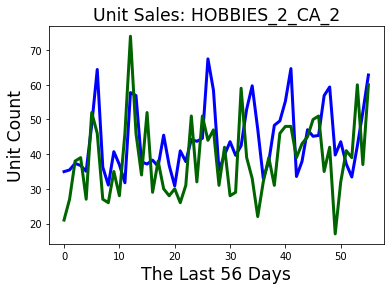

Coefficient of determination: 0.03


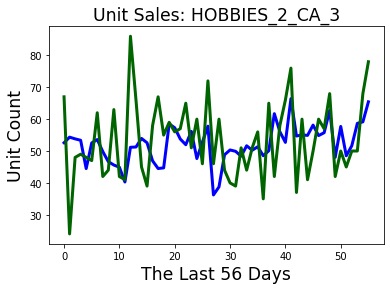

Coefficient of determination: -0.35


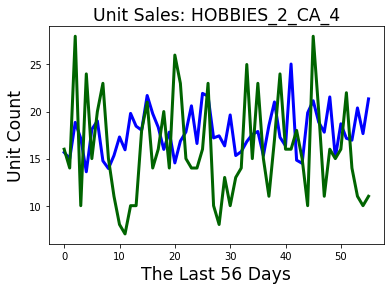

Coefficient of determination: -0.54


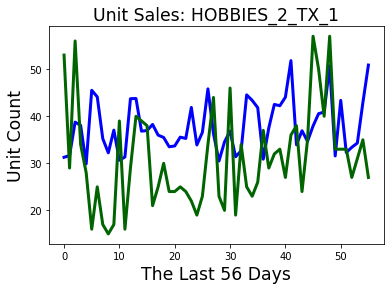

Coefficient of determination: -0.06


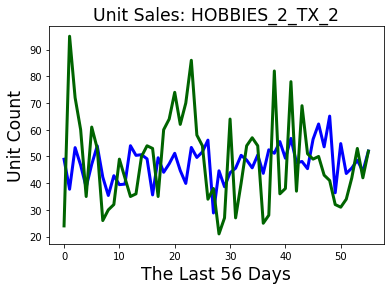

Coefficient of determination: -0.33


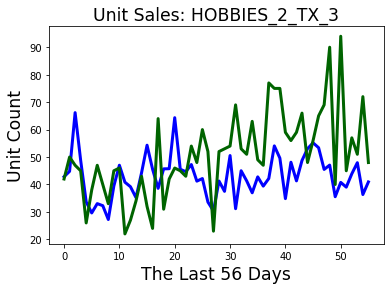

Coefficient of determination: 0.22


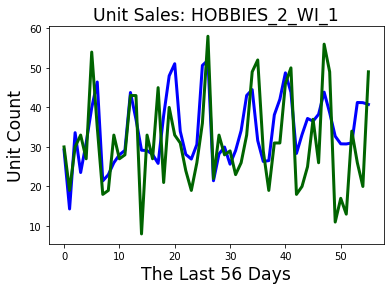

Coefficient of determination: -0.07


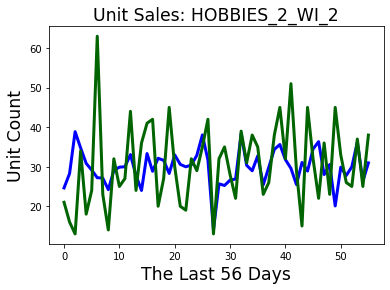

Coefficient of determination: -0.07


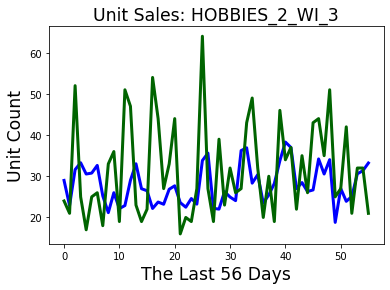

Coefficient of determination: 0.76


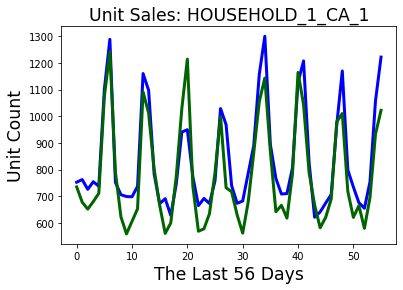

Coefficient of determination: 0.91


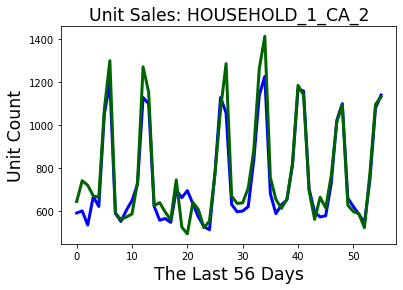

Coefficient of determination: 0.83


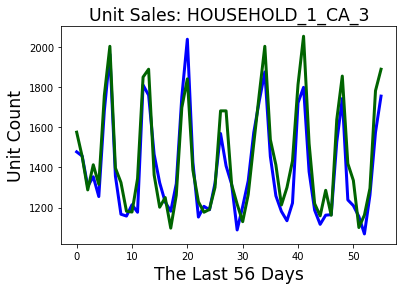

Coefficient of determination: 0.64


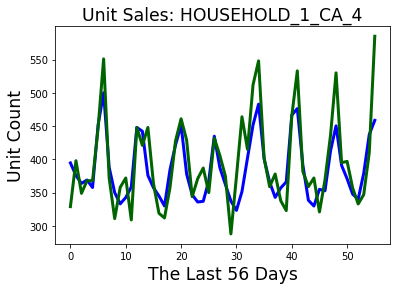

Coefficient of determination: 0.76


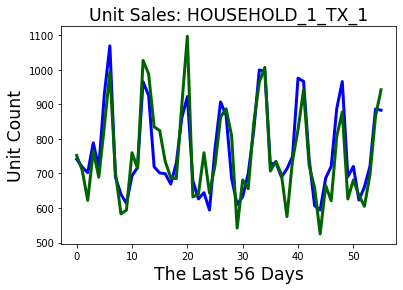

Coefficient of determination: 0.61


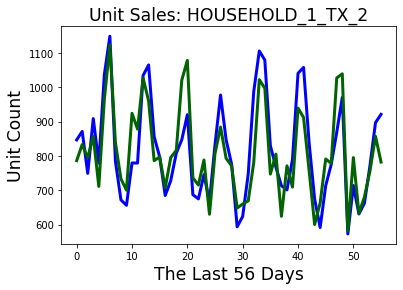

Coefficient of determination: 0.55


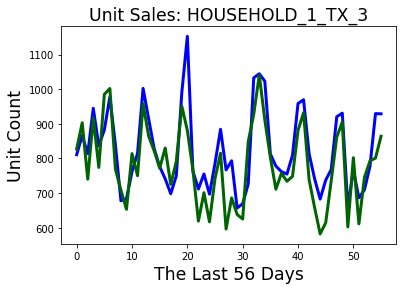

Coefficient of determination: 0.88


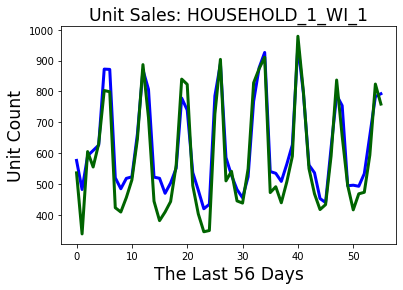

Coefficient of determination: 0.75


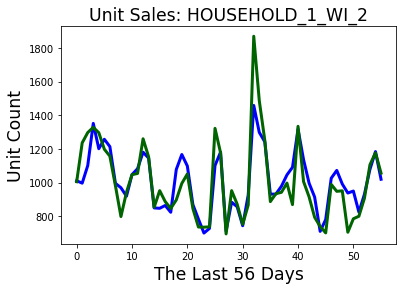

Coefficient of determination: 0.84


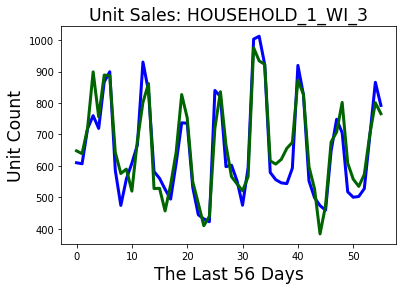

Coefficient of determination: 0.84


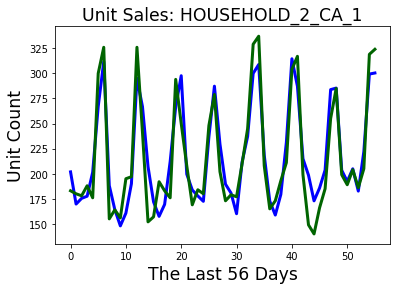

Coefficient of determination: 0.79


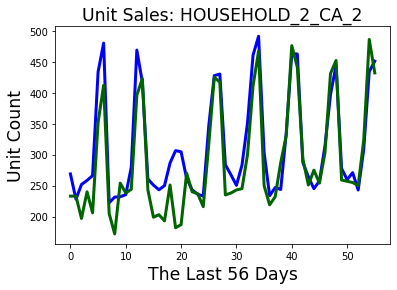

Coefficient of determination: 0.70


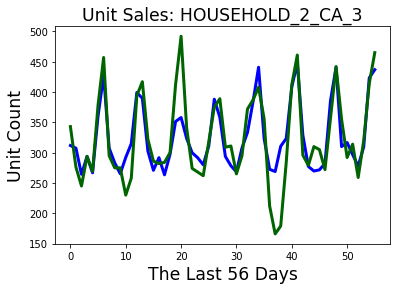

Coefficient of determination: 0.03


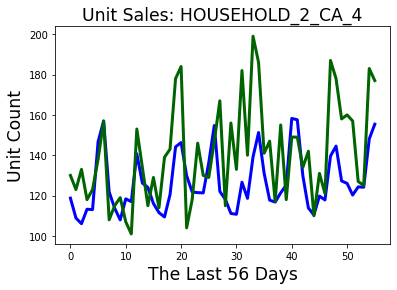

Coefficient of determination: 0.20


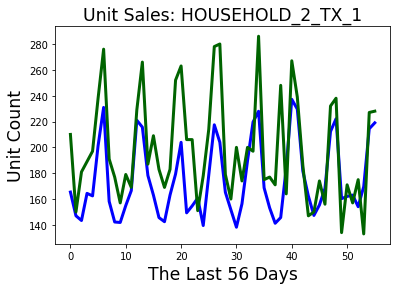

Coefficient of determination: 0.64


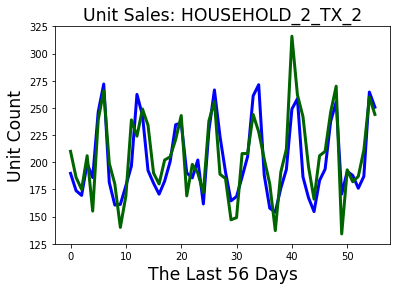

Coefficient of determination: 0.46


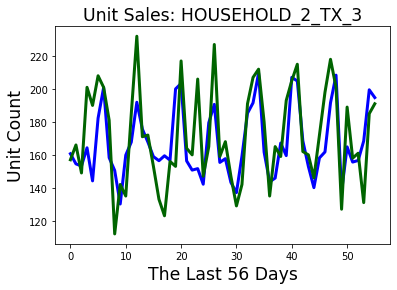

Coefficient of determination: 0.78


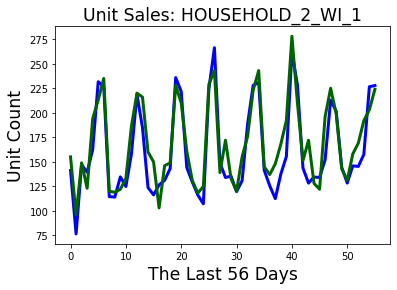

Coefficient of determination: 0.67


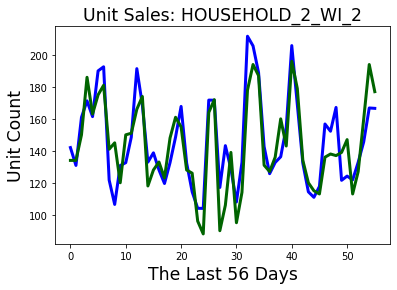

Coefficient of determination: 0.35


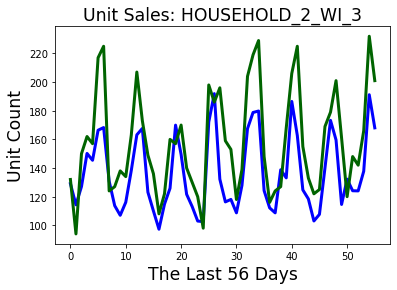

In [16]:
for each_series in train_data_lvl9.columns[1:]:
    wholeList = train_data_lvl9.columns.tolist()
    wholeList.remove(each_series)
    xList = wholeList
    
    X_train = train_data_lvl9[xList]
    Y_train = train_data_lvl9[each_series].astype('int')


    X_test = test_data_lvl9[xList]
    Y_test = test_data_lvl9[each_series].astype('int')


    lr = LinearRegression()
    lr.fit(X_train, Y_train)

    Y_pred = lr.predict(X_test)

    #print('Coefficients: \n', lr.coef_)
    # The mean squared error~~no idea what this 
    #print('Mean squared error: %.2f'
    #      % mean_squared_error(Y_test, Y_pred))
    # The coefficient of determination: 1 means the prediction is flawless
    print('Coefficient of determination: %.2f'
          % r2_score(Y_test, Y_pred))


    # Plot outputs
    #plt.scatter(X_test, Y_test,  color='black')

    plt.plot(Y_pred, color='blue', linewidth=3)
    plt.plot(Y_test.values.tolist(), color='darkgreen', linewidth=3)

    #plt.xticks(())
    #plt.yticks(())
    plt.title("Unit Sales: " + each_series, fontsize = "xx-large")
    plt.xlabel("The Last 56 Days", fontsize = "xx-large")
    plt.ylabel("Unit Count", fontsize = "xx-large")
    plt.show()